# EXPERIMENTS

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from google.colab import drive
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

## DATA

In [2]:
url="https://drive.google.com/file/d/1iJ4lNlprpCUOZZc1tlt73EFcwqpA9iQ4/view?usp=sharing"
url2='https://drive.google.com/uc?id=' + url.split('/')[-2]
x_train_1 = pd.read_csv(url2)

In [3]:
##training_set
#x_train_1 = pd.read_pickle("https://github.com/koraydarwin/earthml/blob/master/raw_glob_train.pkl?raw=true#")
x_train_2 = pd.read_csv("https://github.com/koraydarwin/earthml/blob/master/raw_loc_train.csv?raw=true")
y_train = pd.read_csv("https://raw.githubusercontent.com/koraydarwin/earthml/master/raw_label_train.csv")

##test_set
x_test_1 = pd.read_csv("https://github.com/koraydarwin/earthml/blob/master/test/raw_glob_test.csv?raw=true")
x_test_2 = pd.read_csv("https://github.com/koraydarwin/earthml/blob/master/test/raw_loc_test.csv?raw=true")
y_test = pd.read_csv("https://raw.githubusercontent.com/koraydarwin/earthml/master/test/raw_label_test.csv")

##val_set
x_val_1 = pd.read_csv("https://github.com/koraydarwin/earthml/blob/master/val/raw_glob_val.csv?raw=true")
x_val_2 = pd.read_csv("https://github.com/koraydarwin/earthml/blob/master/val/raw_loc_val.csv?raw=true")
y_val = pd.read_csv("https://raw.githubusercontent.com/koraydarwin/earthml/master/val/raw_label_val.csv")

del x_train_1["Unnamed: 0"]
del x_train_2["Unnamed: 0"]
del y_train["Unnamed: 0"]

x_train_1 = np.asarray(x_train_1)
x_train_2 = np.asarray(x_train_2)
y_train = np.asarray(y_train)

del x_test_1["Unnamed: 0"]
del x_test_2["Unnamed: 0"]
del y_test["Unnamed: 0"]

x_test_1 = np.asarray(x_test_1)
x_test_2 = np.asarray(x_test_2)
y_test = np.asarray(y_test)

del x_val_1["Unnamed: 0"]
del x_val_2["Unnamed: 0"]
del y_val["Unnamed: 0"]

x_val_1 = np.asarray(x_val_1)
x_val_2 = np.asarray(x_val_2)
y_val = np.asarray(y_val)

In [4]:
x_train_1 = x_train_1.reshape((13201, 201, 1))
x_train_2 = x_train_2.reshape((13201, 61, 1))

x_test_1 = x_test_1.reshape((1658, 201, 1))
x_test_2 = x_test_2.reshape((1658, 61, 1))

x_val_1 = x_val_1.reshape((1657, 201, 1))
x_val_2 = x_val_2.reshape((1657, 61, 1))

### Reproducing

In [5]:
##model
input_1 = tf.keras.layers.Input(shape=(201, 1))

x = tf.keras.layers.Conv1D(16, 5, activation='relu', padding='same')(input_1)
x = tf.keras.layers.Conv1D(16, 5, activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPool1D(5, 2, padding='same')(x)
x = tf.keras.layers.Conv1D(32, 5, activation='relu', padding='same')(x)
x = tf.keras.layers.Conv1D(32, 5, activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPool1D(5, 2, padding='same')(x)
x = tf.keras.layers.Conv1D(64, 5, activation='relu', padding='same')(x)
x = tf.keras.layers.Conv1D(64, 5, activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPool1D(5, 2, padding='same')(x)
x = tf.keras.layers.Conv1D(128, 5, activation='relu', padding='same')(x)
x = tf.keras.layers.Conv1D(128, 5, activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPool1D(5, 2, padding='same')(x)
x = tf.keras.layers.Conv1D(256, 5, activation='relu', padding='same')(x)
x = tf.keras.layers.Conv1D(256, 5, activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPool1D(5, 2, padding='same')(x)

x.get_shape().assert_has_rank(3)
net_shape = x.get_shape().as_list()
output_dim = net_shape[1] * net_shape[2]
x = tf.reshape(x, [-1, output_dim], name="flatten")


input_2 = tf.keras.layers.Input(shape=(61, 1))
y = tf.keras.layers.Conv1D(16, 5, activation='relu', padding='same')(input_2)
y = tf.keras.layers.Conv1D(16, 5, activation='relu', padding='same')(y)
y = tf.keras.layers.MaxPool1D(7, 2, padding='same')(y)
y = tf.keras.layers.Conv1D(32, 5, activation='relu', padding='same')(y) 
y = tf.keras.layers.Conv1D(32, 5, activation='relu', padding='same')(y)
y = tf.keras.layers.MaxPool1D(7, 2, padding='same')(y)

y.get_shape().assert_has_rank(3)
net_shape = y.get_shape().as_list()
output_dim = net_shape[1] * net_shape[2]
y = tf.reshape(y, [-1, output_dim], name="flatten")

concat = tf.keras.layers.Concatenate(axis = -1)([x, y])

output = tf.keras.layers.Dense(512)(concat)
output = tf.keras.layers.Dense(512)(output)
output = tf.keras.layers.Dense(512)(output)
output = tf.keras.layers.Dense(512)(output)
output = tf.keras.layers.Dense(1, activation = "sigmoid")(output)

full_model = tf.keras.Model(inputs=[input_1, input_2], outputs=[output])

full_model.summary()

full_model.compile(tf.keras.optimizers.Adam(learning_rate=1e-05, beta_1=0.9, beta_2=0.999, epsilon=1e-08),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
              metrics=["accuracy"])

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 201, 1)]     0           []                               
                                                                                                  
 conv1d (Conv1D)                (None, 201, 16)      96          ['input_1[0][0]']                
                                                                                                  
 conv1d_1 (Conv1D)              (None, 201, 16)      1296        ['conv1d[0][0]']                 
                                                                                                  
 max_pooling1d (MaxPooling1D)   (None, 101, 16)      0           ['conv1d_1[0][0]']               
                                                                                              

In [6]:
history = full_model.fit(
    [x_train_1,
    x_train_2], y_train,
    batch_size=64,
    epochs=65, validation_data=([x_val_1, x_val_2], y_val))

Epoch 1/65
207/207 [==============================] - 10s 29ms/step - loss: 0.3606 - accuracy: 0.8409 - val_loss: 0.2206 - val_accuracy: 0.9113
Epoch 2/65
207/207 [==============================] - 5s 22ms/step - loss: 0.1989 - accuracy: 0.9259 - val_loss: 0.1637 - val_accuracy: 0.9366
Epoch 3/65
207/207 [==============================] - 5s 22ms/step - loss: 0.1521 - accuracy: 0.9440 - val_loss: 0.1350 - val_accuracy: 0.9517
Epoch 4/65
207/207 [==============================] - 5s 22ms/step - loss: 0.1302 - accuracy: 0.9536 - val_loss: 0.1169 - val_accuracy: 0.9529
Epoch 5/65
207/207 [==============================] - 5s 22ms/step - loss: 0.1193 - accuracy: 0.9574 - val_loss: 0.1091 - val_accuracy: 0.9590
Epoch 6/65
207/207 [==============================] - 5s 22ms/step - loss: 0.1127 - accuracy: 0.9595 - val_loss: 0.1080 - val_accuracy: 0.9553
Epoch 7/65
207/207 [==============================] - 5s 22ms/step - loss: 0.1081 - accuracy: 0.9615 - val_loss: 0.1025 - val_accuracy: 0.961

52/52 - 1s - loss: 0.1084 - accuracy: 0.9644 - 1s/epoch - 26ms/step


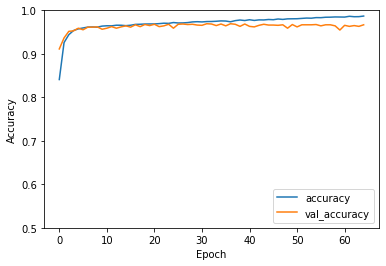

In [7]:
full_model.evaluate([x_test_1, x_test_2],  y_test, verbose=2)

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.savefig("acc.png")

pred =full_model.predict([x_test_1, x_test_2], y_test.all())
np.save("pred.npy", pred)

In [8]:
print(classification_report(y_test, np.round(pred)))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1379
           1       0.87      0.93      0.90       279

    accuracy                           0.96      1658
   macro avg       0.93      0.95      0.94      1658
weighted avg       0.97      0.96      0.96      1658



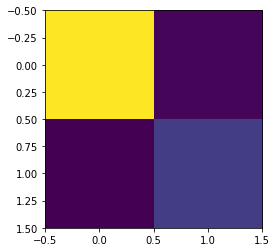

In [9]:
cm = confusion_matrix(y_test, np.round(pred))
plt.imshow(cm)


### Experiment - 1 (GAN Noise)

In [ ]:
#Adding noise
url="https://drive.google.com/file/d/1N9YXf9h1d7UcAdKYhF-2f0CDVl-npvTY/view?usp=sharing"
url2='https://drive.google.com/uc?id=' + url.split('/')[-2]
noise_1 = pd.read_csv(url2)

url="https://drive.google.com/file/d/1HzDuPAfHIvVX2CpWHi-m0iLbdb8dJRV-/view?usp=sharing"
url2='https://drive.google.com/uc?id=' + url.split('/')[-2]
noise_2 = pd.read_csv(url2)

del noise_1["Unnamed: 0"]
del noise_2["Unnamed: 0"]

noise_1 = np.asarray(noise_1)
noise_2 = np.asarray(noise_2)

x_train_1 = x_train_1 + noise_1
x_train_2 = x_train_2 + noise_2


x_train_1 = x_train_1.reshape((13201, 201, 1))
x_train_2 = x_train_2.reshape((13201, 61, 1))

x_test_1 = x_test_1.reshape((1658, 201, 1))
x_test_2 = x_test_2.reshape((1658, 61, 1))

x_val_1 = x_val_1.reshape((1657, 201, 1))
x_val_2 = x_val_2.reshape((1657, 61, 1))

In [ ]:
##model
input_1 = tf.keras.layers.Input(shape=(201, 1))

x = tf.keras.layers.Conv1D(16, 5, activation='relu', padding='same')(input_1)
x = tf.keras.layers.Conv1D(16, 5, activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPool1D(5, 2, padding='same')(x)
x = tf.keras.layers.Conv1D(32, 5, activation='relu', padding='same')(x)
x = tf.keras.layers.Conv1D(32, 5, activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPool1D(5, 2, padding='same')(x)
x = tf.keras.layers.Conv1D(64, 5, activation='relu', padding='same')(x)
x = tf.keras.layers.Conv1D(64, 5, activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPool1D(5, 2, padding='same')(x)
x = tf.keras.layers.Conv1D(128, 5, activation='relu', padding='same')(x)
x = tf.keras.layers.Conv1D(128, 5, activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPool1D(5, 2, padding='same')(x)
x = tf.keras.layers.Conv1D(256, 5, activation='relu', padding='same')(x)
x = tf.keras.layers.Conv1D(256, 5, activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPool1D(5, 2, padding='same')(x)

x.get_shape().assert_has_rank(3)
net_shape = x.get_shape().as_list()
output_dim = net_shape[1] * net_shape[2]
x = tf.reshape(x, [-1, output_dim], name="flatten")


input_2 = tf.keras.layers.Input(shape=(61, 1))
y = tf.keras.layers.Conv1D(16, 5, activation='relu', padding='same')(input_2)
y = tf.keras.layers.Conv1D(16, 5, activation='relu', padding='same')(y)
y = tf.keras.layers.MaxPool1D(7, 2, padding='same')(y)
y = tf.keras.layers.Conv1D(32, 5, activation='relu', padding='same')(y) 
y = tf.keras.layers.Conv1D(32, 5, activation='relu', padding='same')(y)
y = tf.keras.layers.MaxPool1D(7, 2, padding='same')(y)

y.get_shape().assert_has_rank(3)
net_shape = y.get_shape().as_list()
output_dim = net_shape[1] * net_shape[2]
y = tf.reshape(y, [-1, output_dim], name="flatten")

concat = tf.keras.layers.Concatenate(axis = -1)([x, y])

output = tf.keras.layers.Dense(512)(concat)
output = tf.keras.layers.Dense(512)(output)
output = tf.keras.layers.Dense(512)(output)
output = tf.keras.layers.Dense(512)(output)
output = tf.keras.layers.Dense(1, activation = "sigmoid")(output)

full_model = tf.keras.Model(inputs=[input_1, input_2], outputs=[output])

full_model.summary()

full_model.compile(tf.keras.optimizers.Adam(learning_rate=1e-05, beta_1=0.9, beta_2=0.999, epsilon=1e-08),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
              metrics=["accuracy"])

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 201, 1)]     0           []                               
                                                                                                  
 conv1d (Conv1D)                (None, 201, 16)      96          ['input_1[0][0]']                
                                                                                                  
 conv1d_1 (Conv1D)              (None, 201, 16)      1296        ['conv1d[0][0]']                 
                                                                                                  
 max_pooling1d (MaxPooling1D)   (None, 101, 16)      0           ['conv1d_1[0][0]']               
                                                                                              

In [ ]:
history = full_model.fit(
    [x_train_1,
    x_train_2], y_train,
    batch_size=64,
    epochs=65, validation_data=([x_val_1, x_val_2], y_val))

Epoch 1/65
207/207 [==============================] - 17s 27ms/step - loss: 0.3581 - accuracy: 0.8315 - val_loss: 0.2177 - val_accuracy: 0.9221
Epoch 2/65
207/207 [==============================] - 4s 22ms/step - loss: 0.2046 - accuracy: 0.9219 - val_loss: 0.1802 - val_accuracy: 0.9348
Epoch 3/65
207/207 [==============================] - 4s 22ms/step - loss: 0.1601 - accuracy: 0.9398 - val_loss: 0.1492 - val_accuracy: 0.9445
Epoch 4/65
207/207 [==============================] - 5s 22ms/step - loss: 0.1412 - accuracy: 0.9486 - val_loss: 0.1303 - val_accuracy: 0.9463
Epoch 5/65
207/207 [==============================] - 6s 28ms/step - loss: 0.1317 - accuracy: 0.9521 - val_loss: 0.1245 - val_accuracy: 0.9493
Epoch 6/65
207/207 [==============================] - 4s 22ms/step - loss: 0.1267 - accuracy: 0.9535 - val_loss: 0.1225 - val_accuracy: 0.9517
Epoch 7/65
207/207 [==============================] - 5s 22ms/step - loss: 0.1200 - accuracy: 0.9569 - val_loss: 0.1382 - val_accuracy: 0.947

52/52 - 1s - loss: 0.1088 - accuracy: 0.9626 - 631ms/epoch - 12ms/step


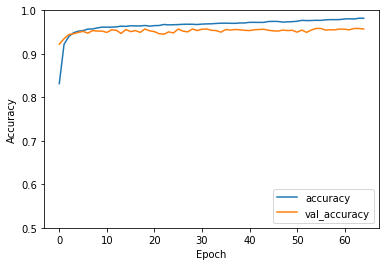

In [ ]:
full_model.evaluate([x_test_1, x_test_2],  y_test, verbose=2)

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.savefig("acc_exp1.png")

pred =full_model.predict([x_test_1, x_test_2], y_test.all())
np.save("pred_exp1.npy", pred)

In [ ]:
print(classification_report(y_test, np.round(pred)))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1379
           1       0.94      0.83      0.88       279

    accuracy                           0.96      1658
   macro avg       0.95      0.91      0.93      1658
weighted avg       0.96      0.96      0.96      1658



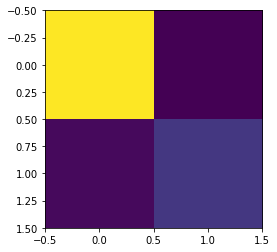

In [ ]:
cm = confusion_matrix(y_test, np.round(pred))
plt.imshow(cm)

## Experiment - 2 (Gaussian Noise)

In [ ]:
noise_1 = np.random.normal(0, np.random.uniform(0.01, 0.15)*np.amax(x_train_1), x_train_1.shape)
noise_2 =np.random.normal(0, np.random.uniform(0.01, 0.15)*np.amax(x_train_2), x_train_2.shape)

x_train_1 = x_train_1 + noise_1
x_train_2 = x_train_2 + noise_2

x_train_1 = x_train_1.reshape((13201, 201, 1))
x_train_2 = x_train_2.reshape((13201, 61, 1))

x_test_1 = x_test_1.reshape((1658, 201, 1))
x_test_2 = x_test_2.reshape((1658, 61, 1))

x_val_1 = x_val_1.reshape((1657, 201, 1))
x_val_2 = x_val_2.reshape((1657, 61, 1))

In [ ]:
##model
input_1 = tf.keras.layers.Input(shape=(201, 1))

x = tf.keras.layers.Conv1D(16, 5, activation='relu', padding='same')(input_1)
x = tf.keras.layers.Conv1D(16, 5, activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPool1D(5, 2, padding='same')(x)
x = tf.keras.layers.Conv1D(32, 5, activation='relu', padding='same')(x)
x = tf.keras.layers.Conv1D(32, 5, activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPool1D(5, 2, padding='same')(x)
x = tf.keras.layers.Conv1D(64, 5, activation='relu', padding='same')(x)
x = tf.keras.layers.Conv1D(64, 5, activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPool1D(5, 2, padding='same')(x)
x = tf.keras.layers.Conv1D(128, 5, activation='relu', padding='same')(x)
x = tf.keras.layers.Conv1D(128, 5, activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPool1D(5, 2, padding='same')(x)
x = tf.keras.layers.Conv1D(256, 5, activation='relu', padding='same')(x)
x = tf.keras.layers.Conv1D(256, 5, activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPool1D(5, 2, padding='same')(x)

x.get_shape().assert_has_rank(3)
net_shape = x.get_shape().as_list()
output_dim = net_shape[1] * net_shape[2]
x = tf.reshape(x, [-1, output_dim], name="flatten")


input_2 = tf.keras.layers.Input(shape=(61, 1))
y = tf.keras.layers.Conv1D(16, 5, activation='relu', padding='same')(input_2)
y = tf.keras.layers.Conv1D(16, 5, activation='relu', padding='same')(y)
y = tf.keras.layers.MaxPool1D(7, 2, padding='same')(y)
y = tf.keras.layers.Conv1D(32, 5, activation='relu', padding='same')(y) 
y = tf.keras.layers.Conv1D(32, 5, activation='relu', padding='same')(y)
y = tf.keras.layers.MaxPool1D(7, 2, padding='same')(y)

y.get_shape().assert_has_rank(3)
net_shape = y.get_shape().as_list()
output_dim = net_shape[1] * net_shape[2]
y = tf.reshape(y, [-1, output_dim], name="flatten")

concat = tf.keras.layers.Concatenate(axis = -1)([x, y])

output = tf.keras.layers.Dense(512)(concat)
output = tf.keras.layers.Dense(512)(output)
output = tf.keras.layers.Dense(512)(output)
output = tf.keras.layers.Dense(512)(output)
output = tf.keras.layers.Dense(1, activation = "sigmoid")(output)

full_model = tf.keras.Model(inputs=[input_1, input_2], outputs=[output])

full_model.summary()

full_model.compile(tf.keras.optimizers.Adam(learning_rate=1e-05, beta_1=0.9, beta_2=0.999, epsilon=1e-08),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
              metrics=["accuracy"])

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 201, 1)]     0           []                               
                                                                                                  
 conv1d (Conv1D)                (None, 201, 16)      96          ['input_1[0][0]']                
                                                                                                  
 conv1d_1 (Conv1D)              (None, 201, 16)      1296        ['conv1d[0][0]']                 
                                                                                                  
 max_pooling1d (MaxPooling1D)   (None, 101, 16)      0           ['conv1d_1[0][0]']               
                                                                                              

In [ ]:
history = full_model.fit(
    [x_train_1,
    x_train_2], y_train,
    batch_size=64,
    epochs=65, validation_data=([x_val_1, x_val_2], y_val))

Epoch 1/65
207/207 [==============================] - 11s 29ms/step - loss: 0.4335 - accuracy: 0.8377 - val_loss: 0.4786 - val_accuracy: 0.8630
Epoch 2/65
207/207 [==============================] - 5s 23ms/step - loss: 0.3420 - accuracy: 0.8413 - val_loss: 0.3231 - val_accuracy: 0.8865
Epoch 3/65
207/207 [==============================] - 5s 22ms/step - loss: 0.3219 - accuracy: 0.8483 - val_loss: 0.3083 - val_accuracy: 0.9028
Epoch 4/65
207/207 [==============================] - 5s 22ms/step - loss: 0.3105 - accuracy: 0.8538 - val_loss: 0.3025 - val_accuracy: 0.8853
Epoch 5/65
207/207 [==============================] - 5s 25ms/step - loss: 0.2922 - accuracy: 0.8658 - val_loss: 0.3075 - val_accuracy: 0.8413
Epoch 6/65
207/207 [==============================] - 5s 23ms/step - loss: 0.2758 - accuracy: 0.8781 - val_loss: 0.3247 - val_accuracy: 0.8214
Epoch 7/65
207/207 [==============================] - 5s 22ms/step - loss: 0.2618 - accuracy: 0.8867 - val_loss: 0.3249 - val_accuracy: 0.818

52/52 - 1s - loss: 1.9434 - accuracy: 0.5525 - 871ms/epoch - 17ms/step


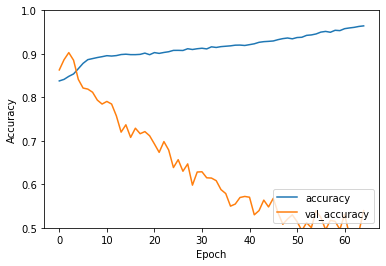

In [ ]:
full_model.evaluate([x_test_1, x_test_2],  y_test, verbose=2)

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.savefig("acc_exp1.png")

pred =full_model.predict([x_test_1, x_test_2], y_test.all())
np.save("pred_exp1.npy", pred)

In [ ]:
print(classification_report(y_test, np.round(pred)))

              precision    recall  f1-score   support

           0       1.00      0.46      0.63      1379
           1       0.27      1.00      0.43       279

    accuracy                           0.55      1658
   macro avg       0.64      0.73      0.53      1658
weighted avg       0.88      0.55      0.60      1658



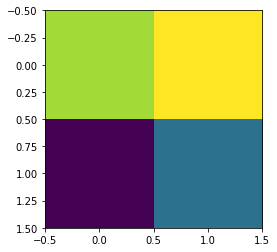

In [ ]:
cm = confusion_matrix(y_test, np.round(pred))
plt.imshow(cm)

## Experiment - 3 (Exponential Noise)

In [13]:
noise_1 = np.random.exponential(0.15*np.amax(x_train_1), x_train_1.shape)
noise_2 =np.random.exponential(0.15*np.amax(x_train_2), x_train_2.shape)

x_train_1 = x_train_1 + noise_1
x_train_2 = x_train_2 + noise_2

x_train_1 = x_train_1.reshape((13201, 201, 1))
x_train_2 = x_train_2.reshape((13201, 61, 1))

x_test_1 = x_test_1.reshape((1658, 201, 1))
x_test_2 = x_test_2.reshape((1658, 61, 1))

x_val_1 = x_val_1.reshape((1657, 201, 1))
x_val_2 = x_val_2.reshape((1657, 61, 1))

In [14]:
##model
input_1 = tf.keras.layers.Input(shape=(201, 1))

x = tf.keras.layers.Conv1D(16, 5, activation='relu', padding='same')(input_1)
x = tf.keras.layers.Conv1D(16, 5, activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPool1D(5, 2, padding='same')(x)
x = tf.keras.layers.Conv1D(32, 5, activation='relu', padding='same')(x)
x = tf.keras.layers.Conv1D(32, 5, activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPool1D(5, 2, padding='same')(x)
x = tf.keras.layers.Conv1D(64, 5, activation='relu', padding='same')(x)
x = tf.keras.layers.Conv1D(64, 5, activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPool1D(5, 2, padding='same')(x)
x = tf.keras.layers.Conv1D(128, 5, activation='relu', padding='same')(x)
x = tf.keras.layers.Conv1D(128, 5, activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPool1D(5, 2, padding='same')(x)
x = tf.keras.layers.Conv1D(256, 5, activation='relu', padding='same')(x)
x = tf.keras.layers.Conv1D(256, 5, activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPool1D(5, 2, padding='same')(x)

x.get_shape().assert_has_rank(3)
net_shape = x.get_shape().as_list()
output_dim = net_shape[1] * net_shape[2]
x = tf.reshape(x, [-1, output_dim], name="flatten")


input_2 = tf.keras.layers.Input(shape=(61, 1))
y = tf.keras.layers.Conv1D(16, 5, activation='relu', padding='same')(input_2)
y = tf.keras.layers.Conv1D(16, 5, activation='relu', padding='same')(y)
y = tf.keras.layers.MaxPool1D(7, 2, padding='same')(y)
y = tf.keras.layers.Conv1D(32, 5, activation='relu', padding='same')(y) 
y = tf.keras.layers.Conv1D(32, 5, activation='relu', padding='same')(y)
y = tf.keras.layers.MaxPool1D(7, 2, padding='same')(y)

y.get_shape().assert_has_rank(3)
net_shape = y.get_shape().as_list()
output_dim = net_shape[1] * net_shape[2]
y = tf.reshape(y, [-1, output_dim], name="flatten")

concat = tf.keras.layers.Concatenate(axis = -1)([x, y])

output = tf.keras.layers.Dense(512)(concat)
output = tf.keras.layers.Dense(512)(output)
output = tf.keras.layers.Dense(512)(output)
output = tf.keras.layers.Dense(512)(output)
output = tf.keras.layers.Dense(1, activation = "sigmoid")(output)

full_model = tf.keras.Model(inputs=[input_1, input_2], outputs=[output])

full_model.summary()

full_model.compile(tf.keras.optimizers.Adam(learning_rate=1e-05, beta_1=0.9, beta_2=0.999, epsilon=1e-08),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
              metrics=["accuracy"])

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 201, 1)]     0           []                               
                                                                                                  
 conv1d_14 (Conv1D)             (None, 201, 16)      96          ['input_3[0][0]']                
                                                                                                  
 conv1d_15 (Conv1D)             (None, 201, 16)      1296        ['conv1d_14[0][0]']              
                                                                                                  
 max_pooling1d_7 (MaxPooling1D)  (None, 101, 16)     0           ['conv1d_15[0][0]']              
                                                                                            

In [15]:
history = full_model.fit(
    [x_train_1,
    x_train_2], y_train,
    batch_size=64,
    epochs=65, validation_data=([x_val_1, x_val_2], y_val))

Epoch 1/65
207/207 [==============================] - 8s 26ms/step - loss: 0.4539 - accuracy: 0.8377 - val_loss: 0.6442 - val_accuracy: 0.8630
Epoch 2/65
207/207 [==============================] - 5s 22ms/step - loss: 0.4440 - accuracy: 0.8377 - val_loss: 0.6051 - val_accuracy: 0.8630
Epoch 3/65
207/207 [==============================] - 5s 22ms/step - loss: 0.4245 - accuracy: 0.8378 - val_loss: 0.5351 - val_accuracy: 0.8630
Epoch 4/65
207/207 [==============================] - 5s 22ms/step - loss: 0.3984 - accuracy: 0.8375 - val_loss: 0.4870 - val_accuracy: 0.8630
Epoch 5/65
207/207 [==============================] - 5s 22ms/step - loss: 0.3893 - accuracy: 0.8372 - val_loss: 0.4940 - val_accuracy: 0.8630
Epoch 6/65
207/207 [==============================] - 5s 22ms/step - loss: 0.3845 - accuracy: 0.8370 - val_loss: 0.4913 - val_accuracy: 0.8630
Epoch 7/65
207/207 [==============================] - 5s 22ms/step - loss: 0.3795 - accuracy: 0.8381 - val_loss: 0.4999 - val_accuracy: 0.8624

52/52 - 1s - loss: 0.4950 - accuracy: 0.7521 - 1s/epoch - 25ms/step


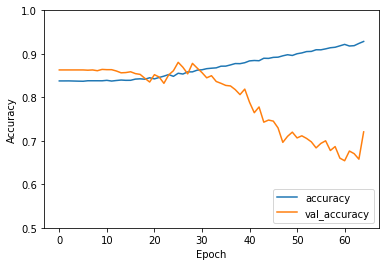

In [16]:
full_model.evaluate([x_test_1, x_test_2],  y_test, verbose=2)

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.savefig("acc_exp3.png")

pred =full_model.predict([x_test_1, x_test_2], y_test.all())
np.save("pred_exp3.npy", pred)

In [17]:
print(classification_report(y_test, np.round(pred)))

              precision    recall  f1-score   support

           0       0.98      0.72      0.83      1379
           1       0.40      0.93      0.56       279

    accuracy                           0.75      1658
   macro avg       0.69      0.82      0.69      1658
weighted avg       0.88      0.75      0.78      1658



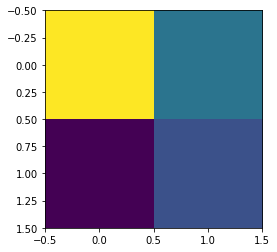

In [18]:
cm = confusion_matrix(y_test, np.round(pred))
plt.imshow(cm)